# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were significantly better at reducing tumor size than Infubino and Ceftamin.

- Mice treated with Capomulin and Ramicane lived longer than those treated with any other drug. 

- Average tumor size was strongly correlated with average mouse weight.

- The results of the study are consistent and there is only one outlier in the data set for the top drugs.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(df["Mouse ID"].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = df.loc[df["Mouse ID"] == "g989", :]
duplicate_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(duplicate_miceID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice_nm = clean_df["Mouse ID"].nunique()
clean_mice_nm

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                             "Median Tumor Volume":median, 
                             "Tumor Volume Variance":var, 
                             "Tumor Volume Std. Dev.":std, 
                             "Tumor Volume Std. Err.":sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_count = clean_df["Drug Regimen"].value_counts()
mice_tested_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

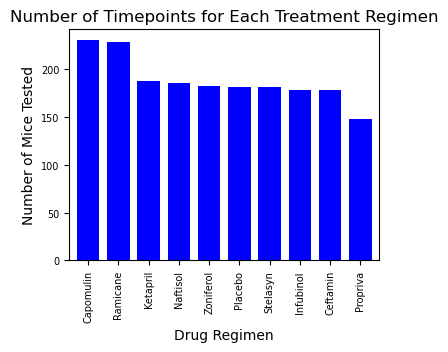

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_tested_count.plot.bar(color='blue', figsize = (4, 3), fontsize = 7, width = 0.75)
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Mice Tested");
plt.title("Number of Timepoints for Each Treatment Regimen");

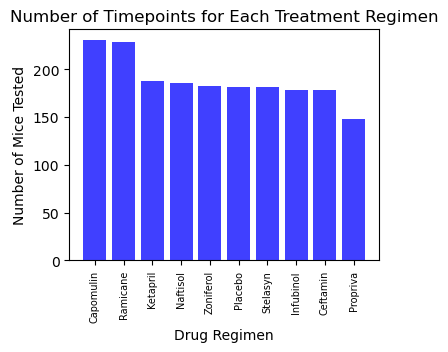

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_tested_count.index.values
y_axis = mice_tested_count.values

plt.bar(x_axis, y_axis, color='b', alpha = 0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Timepoints for Each Treatment Regimen")
plt.xticks(rotation="vertical", fontsize = 7)
plt.rcParams["figure.figsize"] = [4, 3]
plt.show()

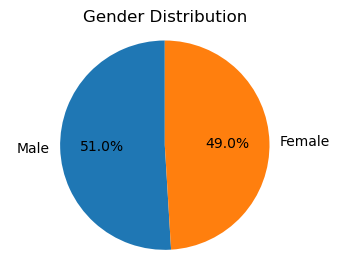

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts();
pie_plot = gender.plot.pie(autopct="%1.1f%%", startangle=90, title="Gender Distribution");
pie_plot.set_ylabel('');
pie_plot.axis("equal");

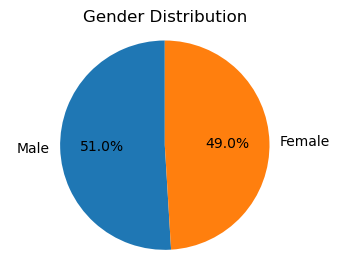

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df['Sex'].value_counts()
plt.title("Gender Distribution")
plt.pie(gender, labels=gender.index.values, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID').max()['Timepoint']
max_timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_final = pd.merge(max_timepoints, clean_df, on=("Mouse ID", "Timepoint"))
tumor_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [22]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
final_tumor_volume = []
outliers = {}

In [35]:
for drug in treatments:
    drug_rows = tumor_final.loc[tumor_final['Drug Regimen'] == drug]
    max_timepoints = drug_rows.groupby('Mouse ID')['Timepoint'].max()
    final_tumor_vol = pd.merge(max_timepoints, drug_rows, on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Tumor Volume (mm3)']]
    final_tumor_volume.append(final_tumor_vol)
    
    # Calculate quartiles, IQR, and bounds for potential outliers
    quartiles = final_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}; {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Find outliers
    outliers_list = final_tumor_vol.loc[(final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
    outliers[drug] = list(outliers_list['Mouse ID'])
    
print("Outliers by Drug Regimen:")
print(outliers)

IQR for Capomulin; 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane; 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol; 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin; 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Outliers by Drug Regimen:
{'Capomulin': [], 'Ramicane': [], 'Infubinol': ['c326'], 'Ceftamin': []}


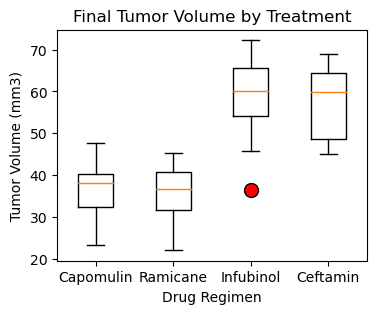

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = [vol['Tumor Volume (mm3)'] for vol in final_tumor_volume]

fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

ax.set_xticklabels(treatments)

plt.show()


## Line and Scatter Plots

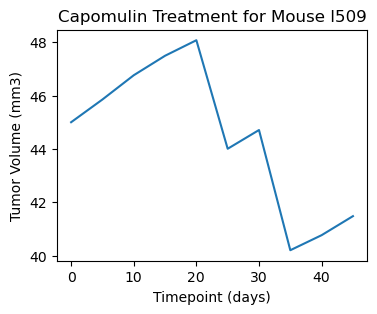

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin Treatment for Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


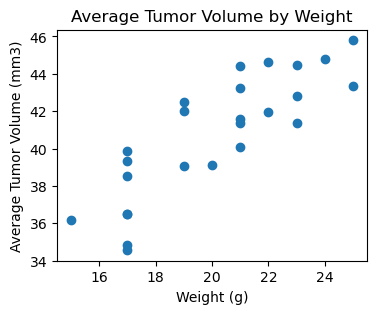

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_group = df[df['Drug Regimen'] == 'Capomulin']
avg_tumor = capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_group.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(x=avg_weight, y=avg_tumor);
plt.xlabel('Weight (g)');
plt.ylabel('Average Tumor Volume (mm3)');
plt.title('Average Tumor Volume by Weight');

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708723


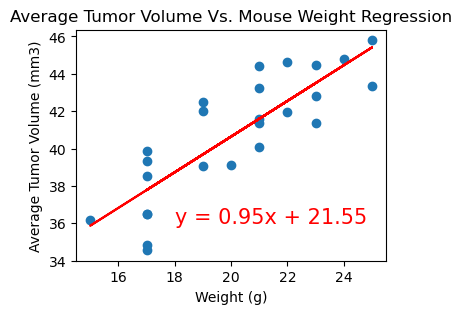

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title('Average Tumor Volume Vs. Mouse Weight Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(avg_weight,avg_tumor)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()